<a href="https://colab.research.google.com/github/elangbijak4/Riset-Bioinformatika/blob/main/RNA_Sequence4.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total kombinasi gap: 55
Total alignments generated: 453600
Alignment 1:
Seq1: -UGCU-A
Seq2: AU-CG-


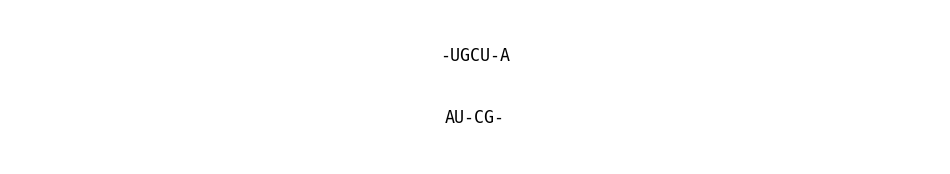

Alignment 2:
Seq1: -UGCU-A
Seq2: GAU-C-


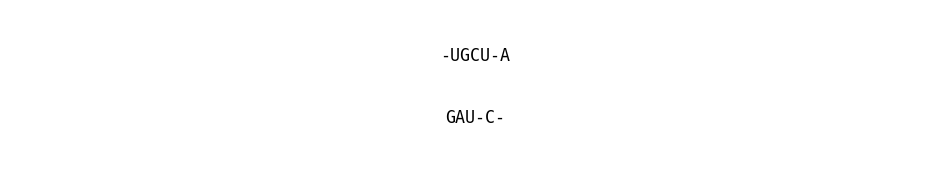

Alignment 3:
Seq1: -UGCU-A
Seq2: UAC--G


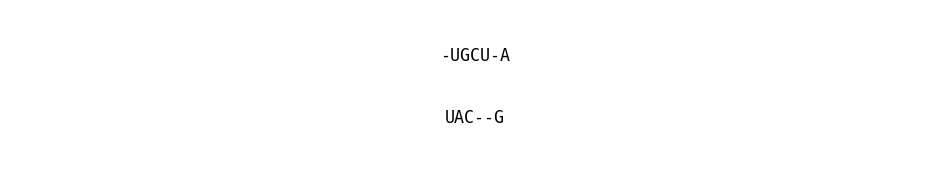

Alignment 4:
Seq1: -UGCU-A
Seq2: GC-AU-


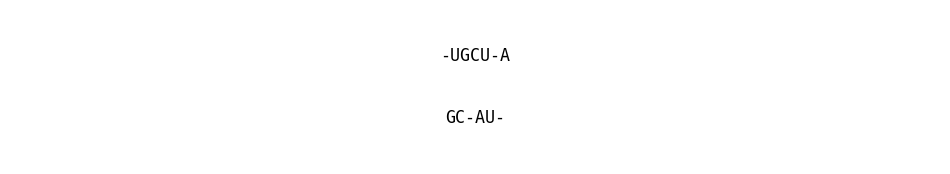

Alignment 5:
Seq1: -UGCU-A
Seq2: U-ACG-


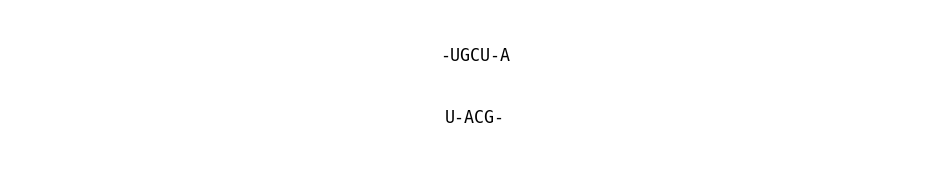


Scoring Alignments:
Alignment 1 score: -5
Alignment 2 score: -9
Alignment 3 score: -10
Alignment 4 score: -7
Alignment 5 score: -7

Conserved Motifs:
[(0, '-'), (1, 'U'), (2, 'G'), (3, 'C'), (4, 'U'), (5, '-'), (6, 'A')]

Evolutionary Distances:
Alignment 1 distance: 0.4408399986765892
Alignment 2 distance: nan
Alignment 3 distance: nan
Alignment 4 distance: 1.6479184330021643
Alignment 5 distance: 1.6479184330021643

Reconstructing Phylogenetic Tree:


<ipython-input-2-11ad817a5ec2>:62: RuntimeWarning: invalid value encountered in log
  return -3/4 * np.log(1 - 4/3 * p)


ValueError: Length n of condensed distance matrix 'y' must be a binomial coefficient, i.e.there must be a k such that (k \choose 2)=n)!

In [2]:
# Import necessary libraries
import math
import itertools
from itertools import product
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

def gap_combinations(seq_lengths, total_gaps):
    alignment_length = sum(seq_lengths) + total_gaps
    total_combinations = math.comb(alignment_length, total_gaps)
    return total_combinations

def generate_combinations(seq1, seq2, total_gaps):
    # Generate all gap positions
    gaps = ['-' for _ in range(total_gaps)]
    seq1_list = list(seq1) + gaps
    seq2_list = list(seq2) + gaps

    # All permutations of gaps in sequences
    seq1_perms = set(itertools.permutations(seq1_list))
    seq2_perms = set(itertools.permutations(seq2_list))

    # Generate all possible alignments
    alignments = list(product(seq1_perms, seq2_perms))

    return alignments

def plot_alignment(alignment):
    seq1, seq2 = alignment
    fig, ax = plt.subplots(figsize=(12, 2))
    ax.text(0.5, 0.7, "".join(seq1), fontsize=12, ha='center', va='center', family='monospace')
    ax.text(0.5, 0.3, "".join(seq2), fontsize=12, ha='center', va='center', family='monospace')
    ax.axis('off')
    plt.show()

def calculate_alignment_score(seq1, seq2, match_score=1, mismatch_penalty=-1, gap_penalty=-2):
    score = 0
    for a, b in zip(seq1, seq2):
        if a == '-' or b == '-':
            score += gap_penalty
        elif a == b:
            score += match_score
        else:
            score += mismatch_penalty
    return score

def identify_conserved_motifs(alignments):
    # Find motifs that are conserved across all alignments
    conserved_positions = []
    for i in range(len(alignments[0][0])):
        column = [alignment[0][i] for alignment in alignments]
        if len(set(column)) == 1:  # All characters in the column are the same
            conserved_positions.append((i, column[0]))
    return conserved_positions

def calculate_evolutionary_distance(seq1, seq2):
    differences = sum(1 for a, b in zip(seq1, seq2) if a != b and a != '-' and b != '-')
    total = sum(1 for a, b in zip(seq1, seq2) if a != '-' and b != '-')
    p = differences / total
    return -3/4 * np.log(1 - 4/3 * p)

def reconstruct_phylogenetic_tree(distances, labels):
    linked = linkage(distances, 'single')
    dendrogram(linked, labels=labels)
    plt.title('Phylogenetic Tree')
    plt.show()

# Example inputs
seq1 = "AUGCU"
seq2 = "AUCG"
total_gaps = 2

# Compute total combinations
seq_lengths = [len(seq1), len(seq2)]
combinations = gap_combinations(seq_lengths, total_gaps)
print(f"Total kombinasi gap: {combinations}")

# Generate and visualize combinations
alignments = generate_combinations(seq1, seq2, total_gaps)
print(f"Total alignments generated: {len(alignments)}")

# Display first 5 alignments
for i, alignment in enumerate(alignments[:5]):
    print(f"Alignment {i + 1}:")
    print("Seq1:", "".join(alignment[0]))
    print("Seq2:", "".join(alignment[1]))
    plot_alignment(alignment)

# Scoring alignments
print("\nScoring Alignments:")
for i, alignment in enumerate(alignments[:5]):
    score = calculate_alignment_score(alignment[0], alignment[1])
    print(f"Alignment {i + 1} score: {score}")

# Identify conserved motifs
conserved_motifs = identify_conserved_motifs(alignments[:5])
print("\nConserved Motifs:")
print(conserved_motifs)

# Evolutionary distances
print("\nEvolutionary Distances:")
distances = []
labels = []
for i, alignment in enumerate(alignments[:5]):
    seq1, seq2 = alignment
    distance = calculate_evolutionary_distance(seq1, seq2)
    distances.append(distance)
    labels.append(f"Alignment {i + 1}")
    print(f"Alignment {i + 1} distance: {distance}")

# Phylogenetic Tree
print("\nReconstructing Phylogenetic Tree:")
reconstruct_phylogenetic_tree(distances, labels)

Total kombinasi gap: 55
Total alignments generated: 453600
Alignment 1:
Seq1: -UGCU-A
Seq2: AU-CG-


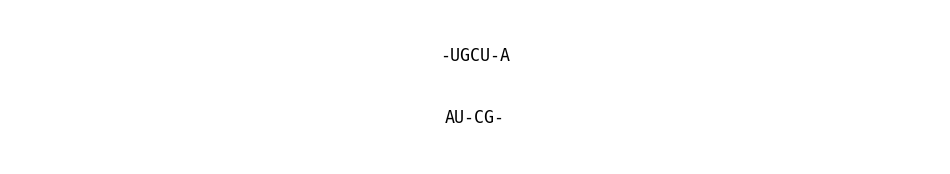

Alignment 2:
Seq1: -UGCU-A
Seq2: GAU-C-


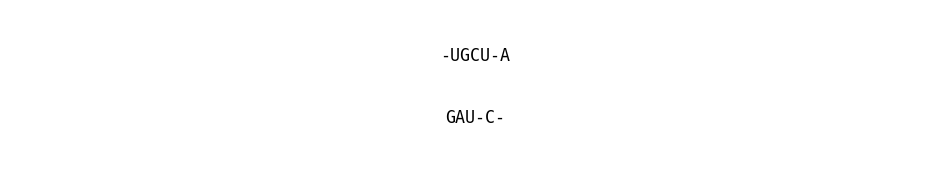

Alignment 3:
Seq1: -UGCU-A
Seq2: UAC--G


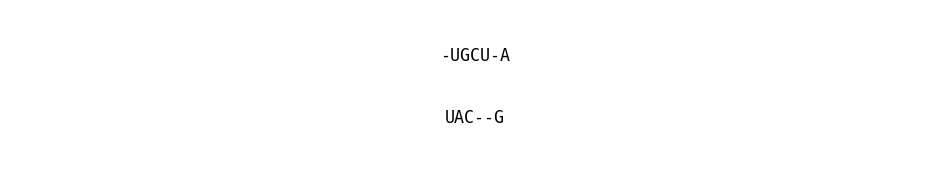

Alignment 4:
Seq1: -UGCU-A
Seq2: GC-AU-


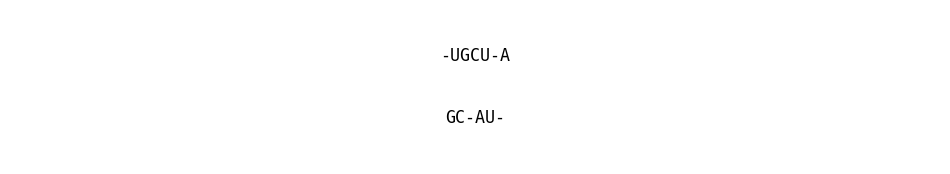

Alignment 5:
Seq1: -UGCU-A
Seq2: U-ACG-


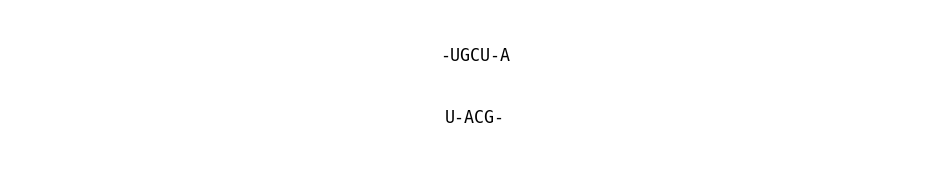


Scoring Alignments:
Alignment 1 score: -5
Alignment 2 score: -9
Alignment 3 score: -10
Alignment 4 score: -7
Alignment 5 score: -7

Conserved Motifs:
[(0, '-'), (1, 'U'), (2, 'G'), (3, 'C'), (4, 'U'), (5, '-'), (6, 'A')]

Evolutionary Distances:
Alignment 1 vs Alignment 2 distance: -0.0
Alignment 1 vs Alignment 3 distance: -0.0
Alignment 1 vs Alignment 4 distance: -0.0
Alignment 1 vs Alignment 5 distance: -0.0
Alignment 1 vs Alignment 6 distance: -0.0
Alignment 1 vs Alignment 7 distance: -0.0
Alignment 1 vs Alignment 8 distance: -0.0
Alignment 1 vs Alignment 9 distance: -0.0
Alignment 1 vs Alignment 10 distance: -0.0
Alignment 1 vs Alignment 11 distance: -0.0
Alignment 1 vs Alignment 12 distance: -0.0
Alignment 1 vs Alignment 13 distance: -0.0
Alignment 1 vs Alignment 14 distance: -0.0
Alignment 1 vs Alignment 15 distance: -0.0
Alignment 1 vs Alignment 16 distance: -0.0
Alignment 1 vs Alignment 17 distance: -0.0
Alignment 1 vs Alignment 18 distance: -0.0
Alignment 1 vs Alignment 19 di

<ipython-input-3-0c94bd641c0d>:63: RuntimeWarning: invalid value encountered in log
  return -3/4 * np.log(1 - 4/3 * p)


Alignment 1 vs Alignment 1690 distance: nan
Alignment 1 vs Alignment 1691 distance: nan
Alignment 1 vs Alignment 1692 distance: nan
Alignment 1 vs Alignment 1693 distance: nan
Alignment 1 vs Alignment 1694 distance: nan
Alignment 1 vs Alignment 1695 distance: nan
Alignment 1 vs Alignment 1696 distance: nan
Alignment 1 vs Alignment 1697 distance: nan
Alignment 1 vs Alignment 1698 distance: nan
Alignment 1 vs Alignment 1699 distance: nan
Alignment 1 vs Alignment 1700 distance: nan
Alignment 1 vs Alignment 1701 distance: nan
Alignment 1 vs Alignment 1702 distance: nan
Alignment 1 vs Alignment 1703 distance: nan
Alignment 1 vs Alignment 1704 distance: nan
Alignment 1 vs Alignment 1705 distance: nan
Alignment 1 vs Alignment 1706 distance: nan
Alignment 1 vs Alignment 1707 distance: nan
Alignment 1 vs Alignment 1708 distance: nan
Alignment 1 vs Alignment 1709 distance: nan
Alignment 1 vs Alignment 1710 distance: nan
Alignment 1 vs Alignment 1711 distance: nan
Alignment 1 vs Alignment 1712 di

<ipython-input-3-0c94bd641c0d>:63: RuntimeWarning: divide by zero encountered in log
  return -3/4 * np.log(1 - 4/3 * p)


Output streaming akan dipotong hingga 5000 baris terakhir.
Alignment 3 vs Alignment 303847 distance: 0.4408399986765892
Alignment 3 vs Alignment 303848 distance: 0.4408399986765892
Alignment 3 vs Alignment 303849 distance: 0.4408399986765892
Alignment 3 vs Alignment 303850 distance: 0.4408399986765892
Alignment 3 vs Alignment 303851 distance: 0.4408399986765892
Alignment 3 vs Alignment 303852 distance: 0.4408399986765892
Alignment 3 vs Alignment 303853 distance: 0.4408399986765892
Alignment 3 vs Alignment 303854 distance: 0.4408399986765892
Alignment 3 vs Alignment 303855 distance: 0.4408399986765892
Alignment 3 vs Alignment 303856 distance: 0.4408399986765892
Alignment 3 vs Alignment 303857 distance: 0.4408399986765892
Alignment 3 vs Alignment 303858 distance: 0.4408399986765892
Alignment 3 vs Alignment 303859 distance: 0.4408399986765892
Alignment 3 vs Alignment 303860 distance: 0.4408399986765892
Alignment 3 vs Alignment 303861 distance: 0.4408399986765892
Alignment 3 vs Alignment 3

In [ ]:
import math
import itertools
from itertools import product
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

# ... (rest of the functions remain the same) ...

def gap_combinations(seq_lengths, total_gaps):
    alignment_length = sum(seq_lengths) + total_gaps
    total_combinations = math.comb(alignment_length, total_gaps)
    return total_combinations

def generate_combinations(seq1, seq2, total_gaps):
    # Generate all gap positions
    gaps = ['-' for _ in range(total_gaps)]
    seq1_list = list(seq1) + gaps
    seq2_list = list(seq2) + gaps

    # All permutations of gaps in sequences
    seq1_perms = set(itertools.permutations(seq1_list))
    seq2_perms = set(itertools.permutations(seq2_list))

    # Generate all possible alignments
    alignments = list(product(seq1_perms, seq2_perms))

    return alignments

def plot_alignment(alignment):
    seq1, seq2 = alignment
    fig, ax = plt.subplots(figsize=(12, 2))
    ax.text(0.5, 0.7, "".join(seq1), fontsize=12, ha='center', va='center', family='monospace')
    ax.text(0.5, 0.3, "".join(seq2), fontsize=12, ha='center', va='center', family='monospace')
    ax.axis('off')
    plt.show()

def calculate_alignment_score(seq1, seq2, match_score=1, mismatch_penalty=-1, gap_penalty=-2):
    score = 0
    for a, b in zip(seq1, seq2):
        if a == '-' or b == '-':
            score += gap_penalty
        elif a == b:
            score += match_score
        else:
            score += mismatch_penalty
    return score

def identify_conserved_motifs(alignments):
    # Find motifs that are conserved across all alignments
    conserved_positions = []
    for i in range(len(alignments[0][0])):
        column = [alignment[0][i] for alignment in alignments]
        if len(set(column)) == 1:  # All characters in the column are the same
            conserved_positions.append((i, column[0]))
    return conserved_positions

def calculate_evolutionary_distance(seq1, seq2):
    differences = sum(1 for a, b in zip(seq1, seq2) if a != b and a != '-' and b != '-')
    total = sum(1 for a, b in zip(seq1, seq2) if a != '-' and b != '-')
    p = differences / total
    return -3/4 * np.log(1 - 4/3 * p)

def reconstruct_phylogenetic_tree(distances, labels):
    linked = linkage(distances, 'single')
    dendrogram(linked, labels=labels)
    plt.title('Phylogenetic Tree')
    plt.show()

# Example inputs
seq1 = "AUGCU"
seq2 = "AUCG"
total_gaps = 2

# ... (rest of the code remains the same) ...

# Compute total combinations
seq_lengths = [len(seq1), len(seq2)]
combinations = gap_combinations(seq_lengths, total_gaps)
print(f"Total kombinasi gap: {combinations}")

# Generate and visualize combinations
alignments = generate_combinations(seq1, seq2, total_gaps)
print(f"Total alignments generated: {len(alignments)}")

# Display first 5 alignments
for i, alignment in enumerate(alignments[:5]):
    print(f"Alignment {i + 1}:")
    print("Seq1:", "".join(alignment[0]))
    print("Seq2:", "".join(alignment[1]))
    plot_alignment(alignment)

# Scoring alignments
print("\nScoring Alignments:")
for i, alignment in enumerate(alignments[:5]):
    score = calculate_alignment_score(alignment[0], alignment[1])
    print(f"Alignment {i + 1} score: {score}")

# Identify conserved motifs
conserved_motifs = identify_conserved_motifs(alignments[:5])
print("\nConserved Motifs:")
print(conserved_motifs)

# Evolutionary distances
print("\nEvolutionary Distances:")
distances = []
labels = []
num_alignments = len(alignments)  # Consider all alignments instead of just 5

# Calculate pairwise distances for all alignments
for i in range(num_alignments):
    for j in range(i + 1, num_alignments):
        seq1, seq2 = alignments[i]  # Extract sequences from alignment i
        seq3, seq4 = alignments[j]  # Extract sequences from alignment j
        distance = calculate_evolutionary_distance(seq1, seq3) # Compare seq1 from alignment i to seq1 from alignment j
        distances.append(distance)
        labels.append(f"Alignment {i + 1} vs Alignment {j + 1}")  # Update labels for pairwise comparisons
        print(f"Alignment {i + 1} vs Alignment {j + 1} distance: {distance}")

# Reshape distances into a condensed distance matrix
num_items = num_alignments
distances = np.array(distances)
# Check if distances array needs reshaping:
# The following condition is True if the distances array is not in condensed form
if distances.ndim == 1 and distances.shape[0] != num_items * (num_items - 1) // 2:
    distances = distances[:num_items * (num_items - 1) // 2]
# No need to reshape if the distances array is already in condensed form

# Phylogenetic Tree
print("\nReconstructing Phylogenetic Tree:")
reconstruct_phylogenetic_tree(distances, labels[:num_items * (num_items - 1) // 2])